In [14]:
# Changing Working Directory
import os
os.chdir('..//..')
os.getcwd()

'c:\\Users\\hadas-stud-group2\\Documents\\GitHub\\neural_cstg'

In [15]:
# Importing
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as spio
from GaligoolAngel.utils import vector_to_symmetric_matrix

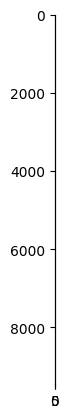

In [29]:
# Loading Results
path = 'C://Users//hadas-stud-group2//Documents//GitHub//results//_2024_03_05_00_02_47_animal_1//c-stg_hidden[50, 500]_lr0.0005_lam0.1_Final_check.mat'

data = spio.loadmat(path)

mus = data["mu_vals"]



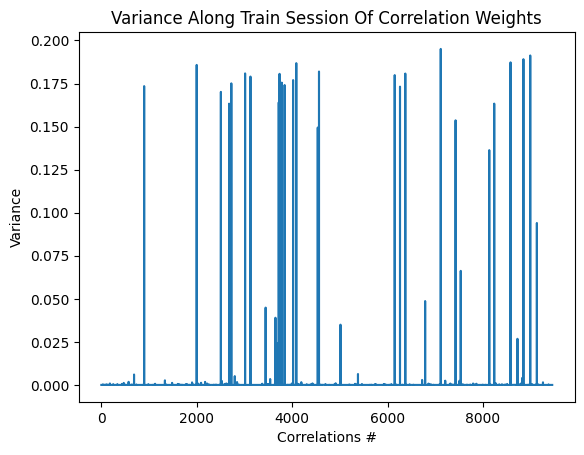

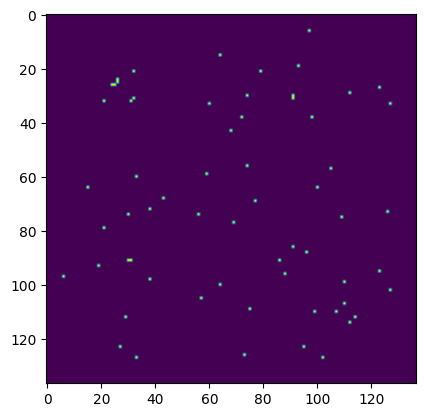

In [18]:
# Basic analysis
mu_var = np.var(mus, axis=1)

plt.figure()
plt.plot(mu_var)
plt.title("Variance Along Train Session Of Correlation Weights")
plt.xlabel("Correlations #")
plt.ylabel("Variance")

mu_var[mu_var > 0.025] = 1
mu_var[mu_var < 0.025] = 0

plt.figure()
mu_matrix =  vector_to_symmetric_matrix(mu_var)
plt.imshow(mu_matrix)



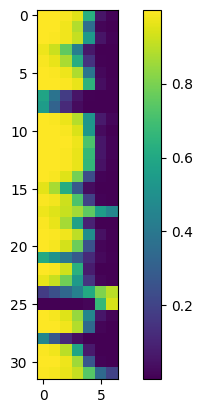

In [27]:
# Looking at the change of the correlations whose variance is greater
interest_mus = mus[mu_var == 1]

plt.figure()
plt.imshow(interest_mus)
plt.colorbar()